# Employee Attrition Analysis 🚀


## 1️⃣ Introduction

### Overview of the Problem  
Employee attrition is a critical challenge for organizations, leading to increased hiring costs, loss of experienced talent, and disruptions in workflow. Understanding the factors influencing attrition is essential for developing data-driven strategies to improve employee retention.  

### Business Impact of Attrition  
High attrition rates can significantly impact a company's performance by:  
- Increasing recruitment and training costs.  
- Reducing overall employee morale and productivity.  
- Leading to knowledge loss and operational inefficiencies.  
- Affecting customer satisfaction due to frequent staff turnover.  

### Objectives of This Analysis  
This project aims to analyze employee attrition using machine learning and data science techniques. The key objectives include:  
- Identifying the primary factors that contribute to employee attrition.  
- Building predictive models to assess employee attrition risk.  
- Using SHAP (SHapley Additive exPlanations) to interpret feature importance.  
- Providing actionable insights and recommendations to help businesses reduce attrition.  


In [6]:
# Importing Libraries for EDA.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Importing Dataset using pandas library.
DataSet = pd.read_csv("../Data_Overview/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [8]:
analysis_df = DataSet
analysis_df.shape

(1470, 35)

In [9]:
analysis_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## 2️⃣ Exploratory Data Analysis (EDA) 🔍
- Data Cleaning  
- Feature Distributions  
- Attrition Insights  

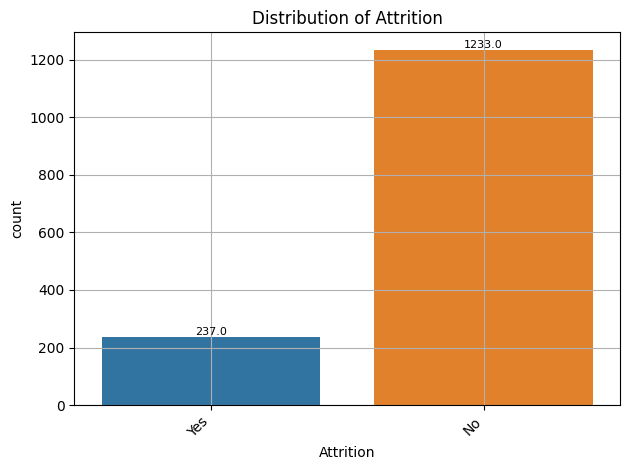

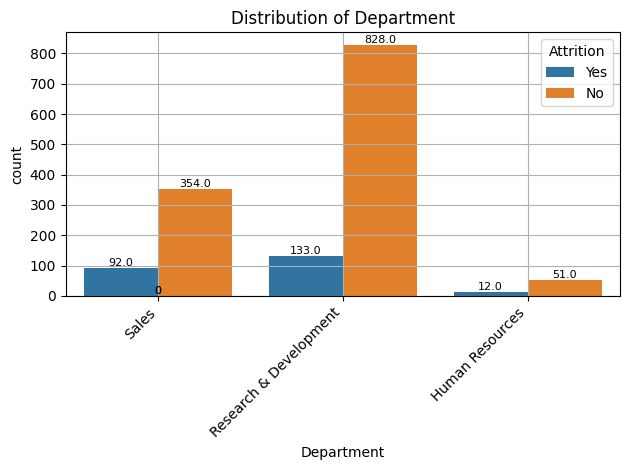

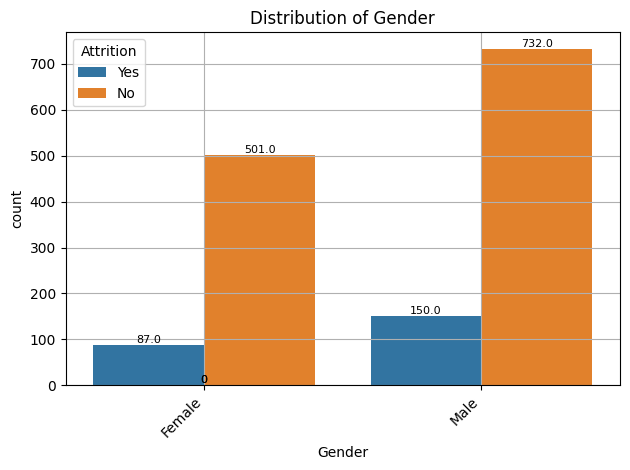

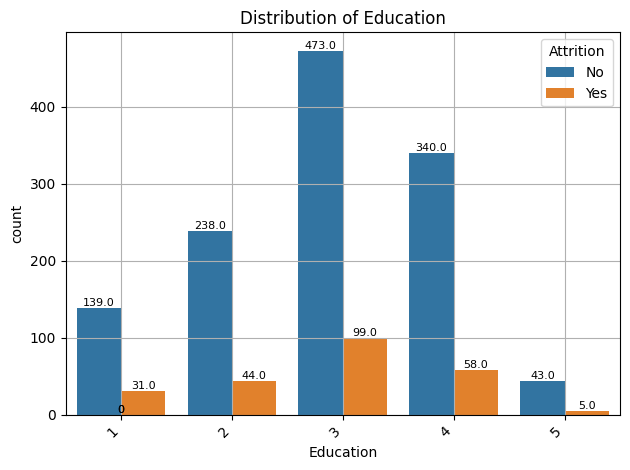

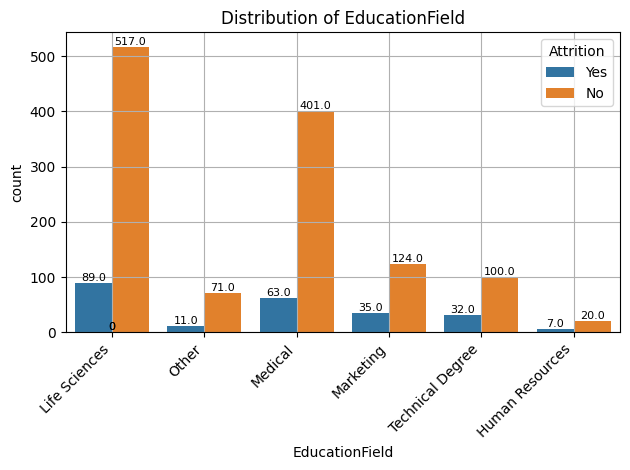

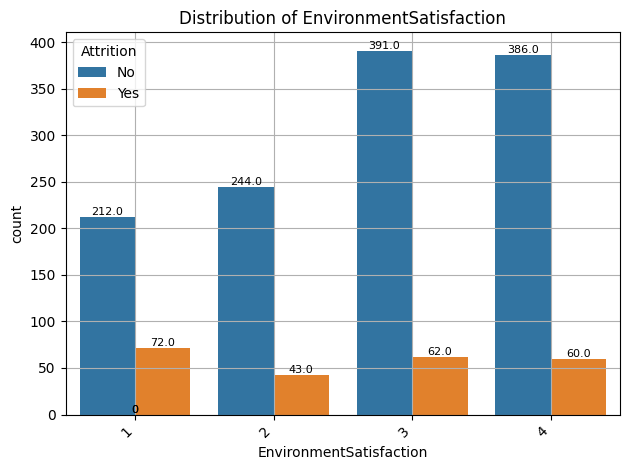

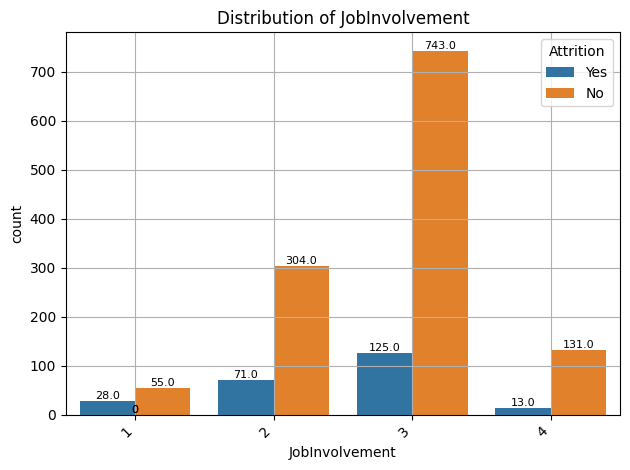

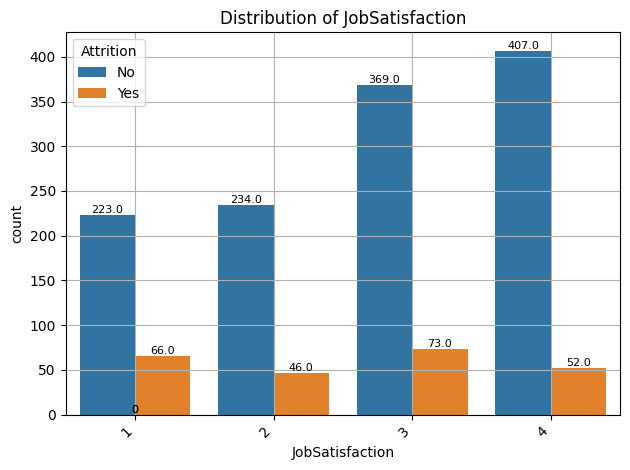

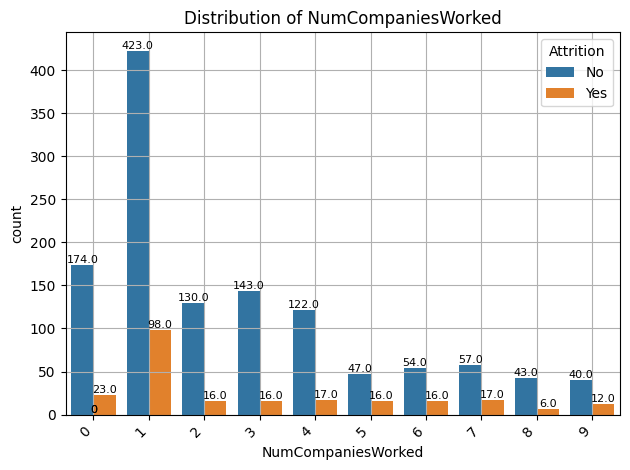

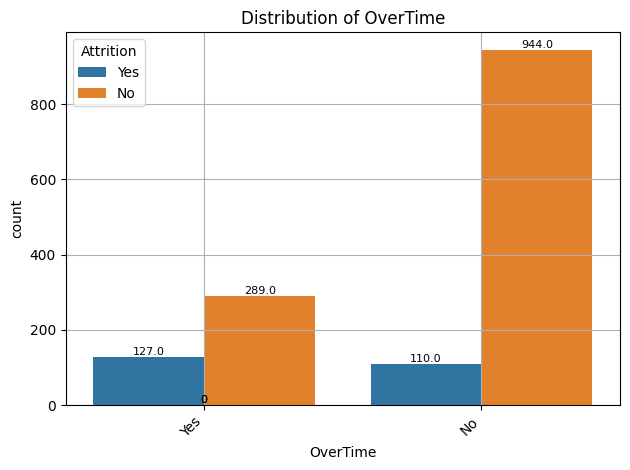

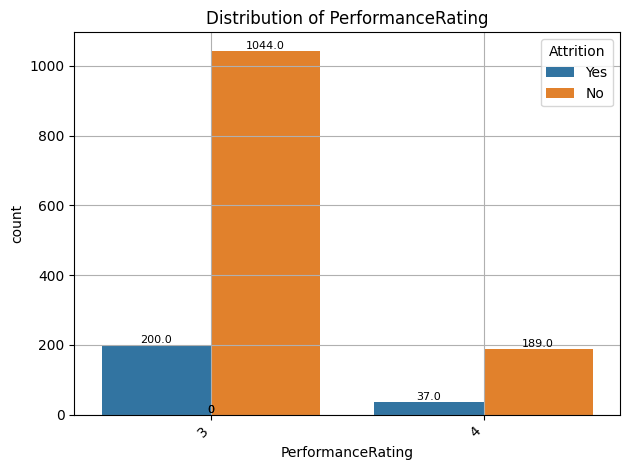

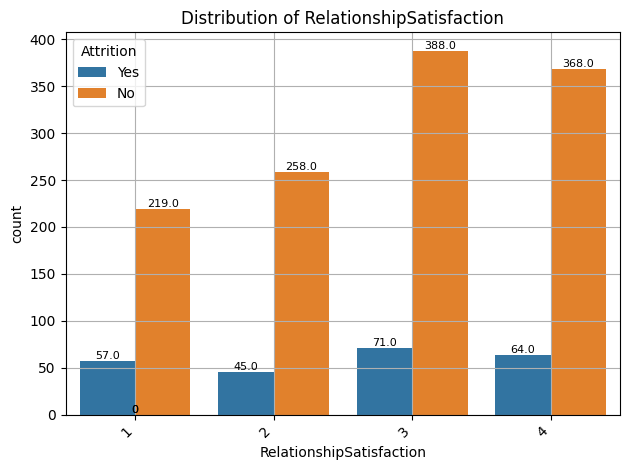

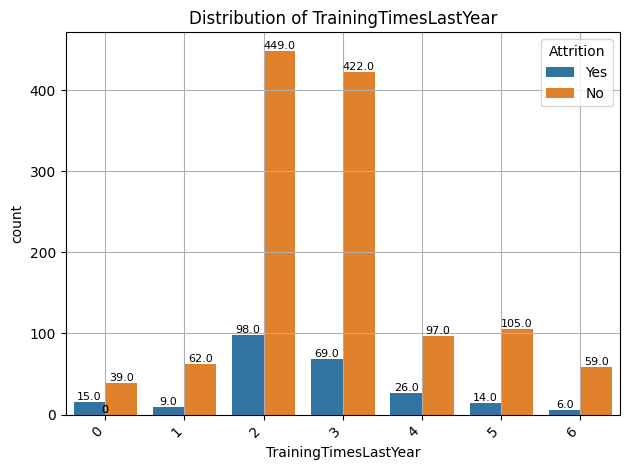

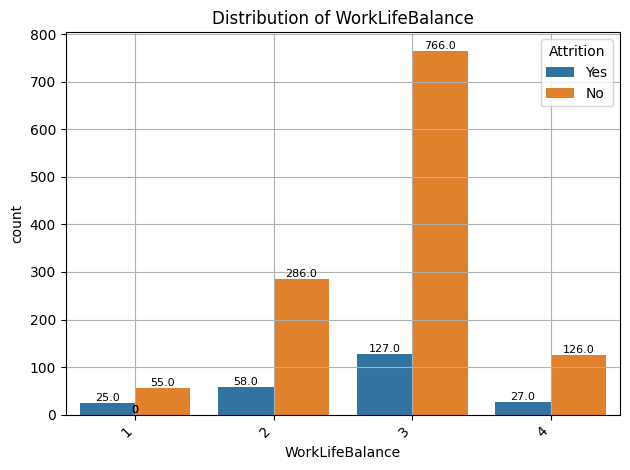

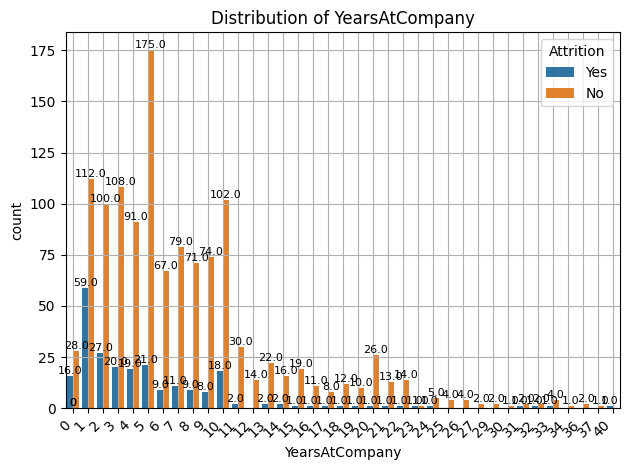

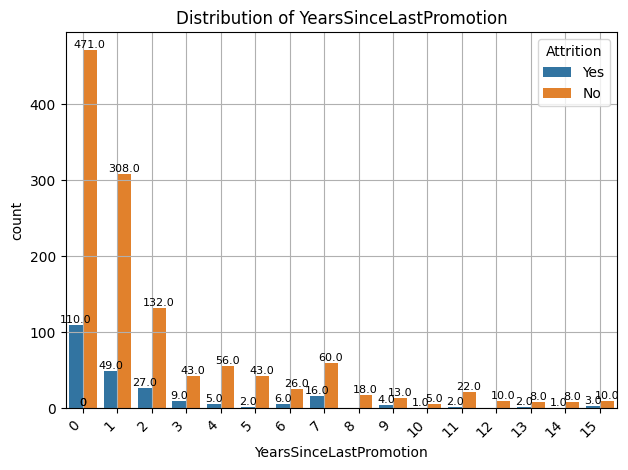

In [10]:
def plot_countplot_with_hue(features,df,hue):
    for feature in features:    
        ax = sns.countplot(x=feature, data=df,hue=hue)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),ha='center', va='bottom', fontsize=8, color='black')
        plt.grid(True)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  
        plt.show()

features_to_plot_with_hue = ['Attrition', 'Department', 'Gender', 'Education', 'EducationField','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', "YearsAtCompany","YearsSinceLastPromotion"]

plot_countplot_with_hue(features_to_plot_with_hue,analysis_df,'Attrition')

The above graph displays count plots for several organizational features, color‐coded by attrition status (“Yes” or “No”). It highlights notable trends in job satisfaction, overtime, relationship satisfaction, and tenure, offering insights into potential drivers of employee turnover.

1. Out of 1470 employees, **237** (approximately **16%**) have left the organization.
2. **Environment Satisfaction** levels of **1** and **2** are notably high, with 284 and 287 employees respectively.
3. Similarly, **Job Satisfaction** levels of **1** and **2** are notably high, with 289 and 280 employees respectively, and the majority of those who have resigned fall into these lower satisfaction brackets. A portion of employees with a moderate satisfaction level (**3**) have also exited the company.  
4. Approximately **400** employees report working **overtime**; however, many of these individuals still choose to leave, suggesting that overtime compensation or other retention factors may be insufficient.  
5. **Relationship Satisfaction** levels of **1** and **2** are found in 276 and 303 employees, respectively, raising potential concerns about the workplace culture and environment.  
6. Finally, the data indicates that most employees who do leave the organization tend to do so within **two to three years** of service.

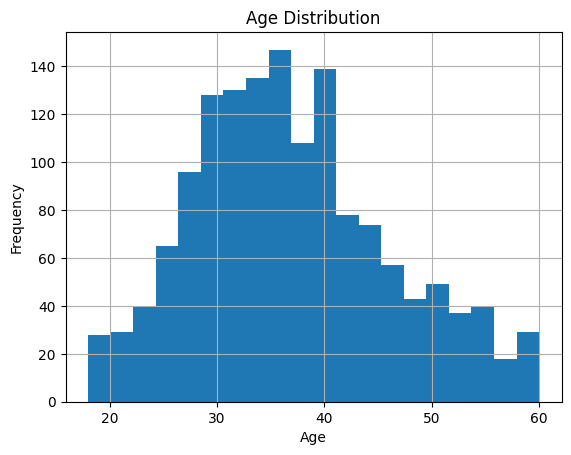

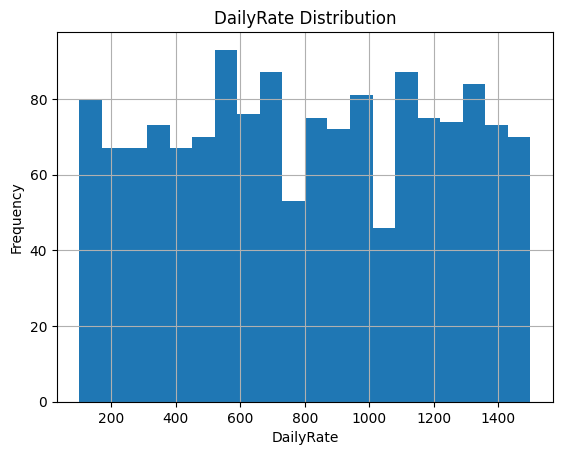

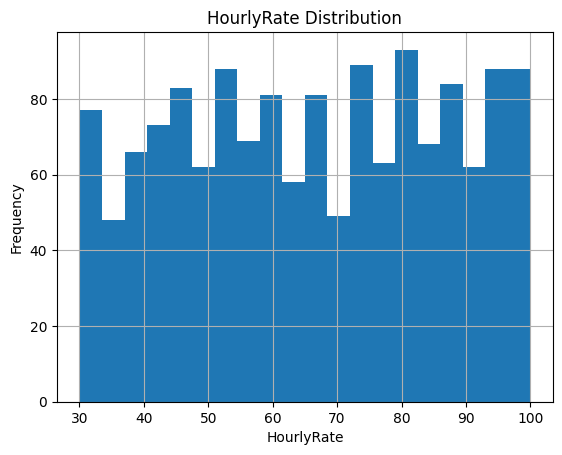

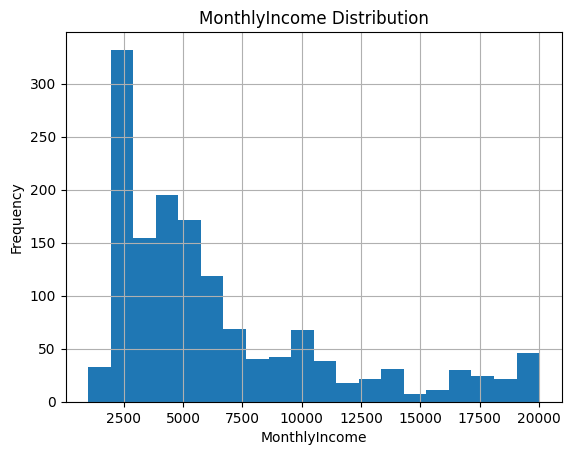

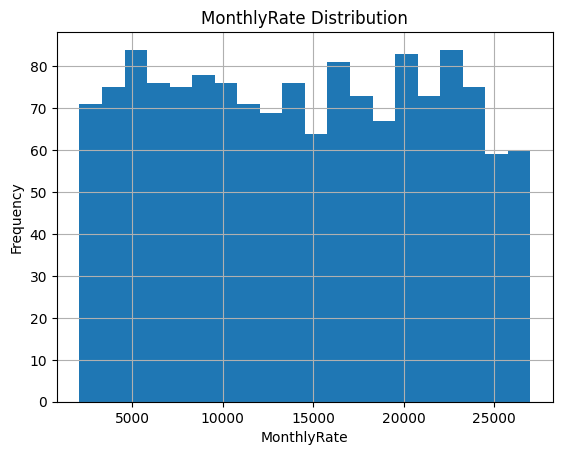

In [11]:
def plot_hist(features,df):
    for feature in features:    
        df[feature].hist(bins=20)
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

features_to_histplot = ['Age', 'DailyRate','HourlyRate', 'MonthlyIncome', 'MonthlyRate']
plot_hist(features_to_histplot,analysis_df)

In [12]:
features_to_scatterplot = [
    # Tenure and Income
    ("YearsAtCompany", "MonthlyIncome"),
    ("TotalWorkingYears", "MonthlyIncome"),
    ("Age", "MonthlyIncome"),

    # Age and Experience
    ("Age", "TotalWorkingYears"),
    ("Age", "YearsAtCompany"),

    # Promotions and Tenure
    ("YearsAtCompany", "YearsSinceLastPromotion"),
    ("YearsAtCompany", "YearsWithCurrManager"),
    ("YearsInCurrentRole", "YearsWithCurrManager"),

    # Distance, Rate, and Pay
    ("DistanceFromHome", "MonthlyIncome"),
    ("DailyRate", "MonthlyRate"),

    # Performance and Salary Increases
    ("PerformanceRating", "PercentSalaryHike"),

    # Satisfaction & Other Discrete Numeric Fields
    ("JobSatisfaction", "EnvironmentSatisfaction"),
    ("JobSatisfaction", "WorkLifeBalance"),
    ("JobInvolvement", "PerformanceRating"),

    # Additional Potential Pairs
    ("NumCompaniesWorked", "YearsAtCompany"),
    ("StockOptionLevel", "MonthlyIncome"),
    ("TrainingTimesLastYear", "PerformanceRating")
]

def plot_scatterplot(features,df):
    for feature1,feature2 in features:
        sns.scatterplot(data=df, x=feature1, y=feature2)
        plt.grid(True)
        plt.title(f"{feature1} vs {feature2}")
        plt.show()

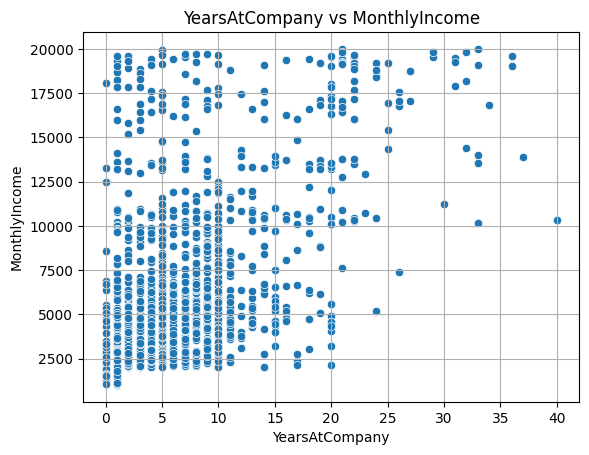

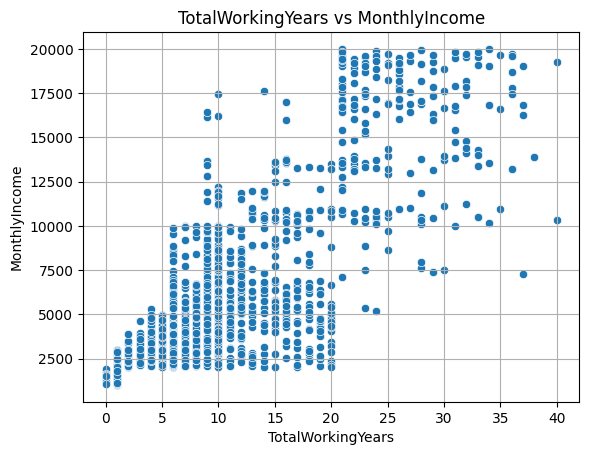

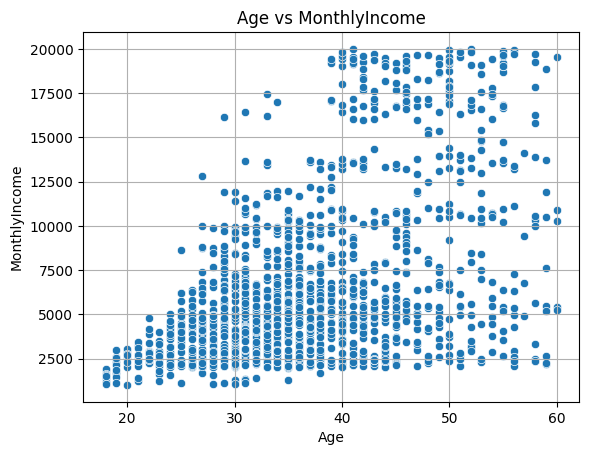

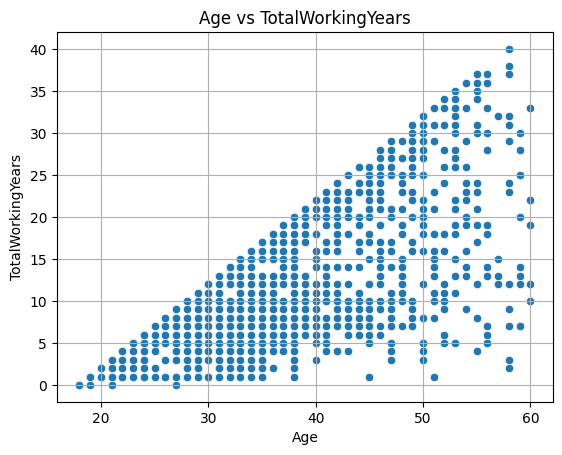

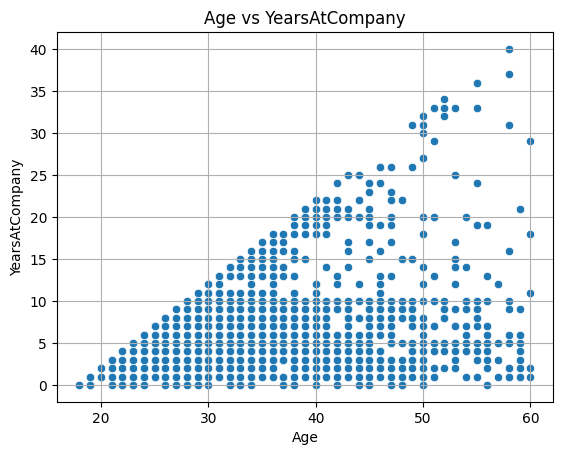

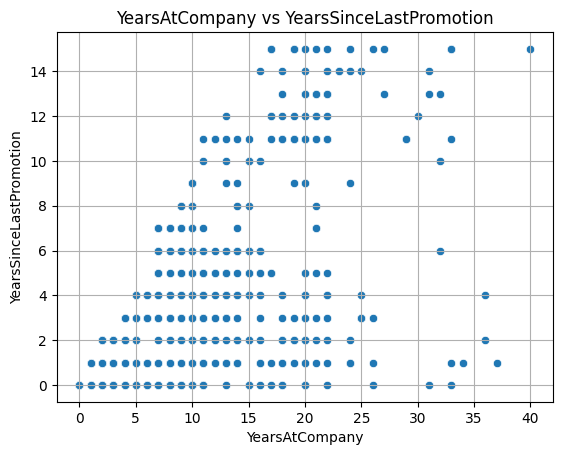

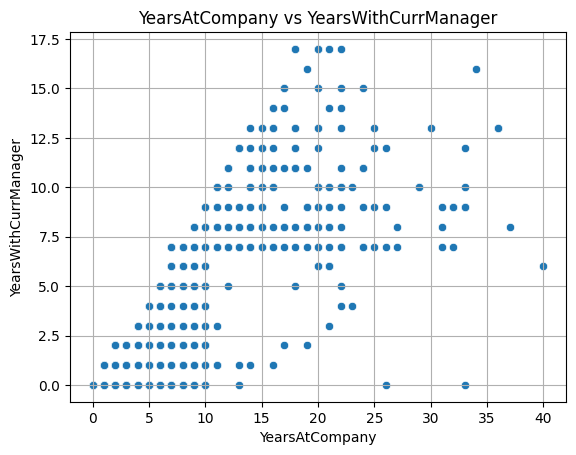

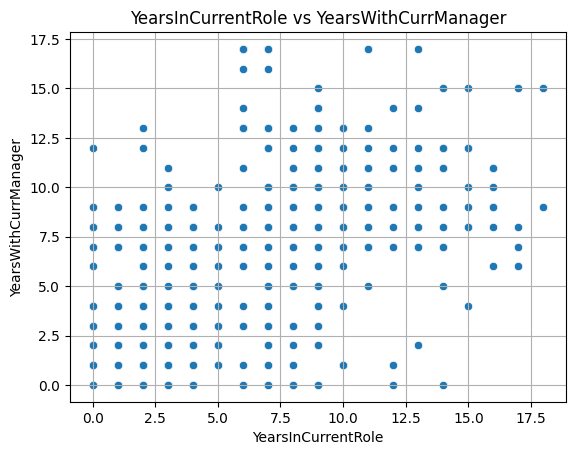

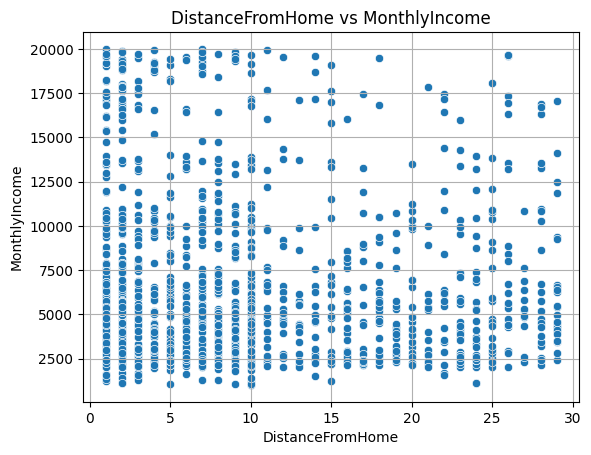

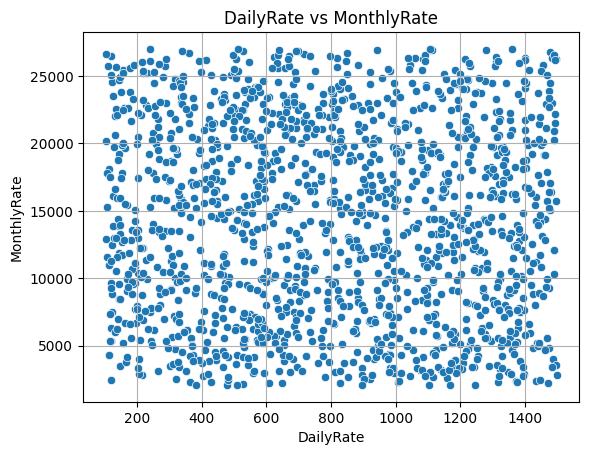

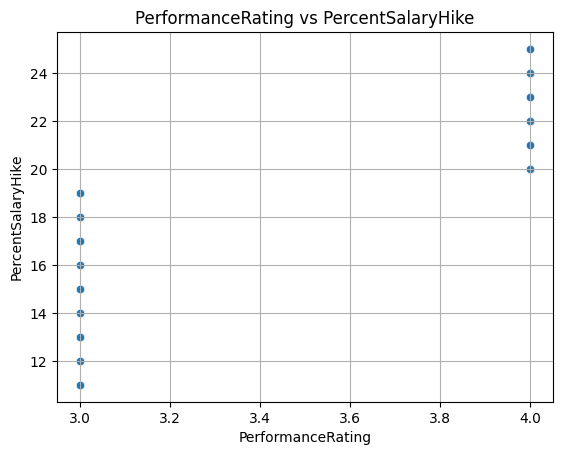

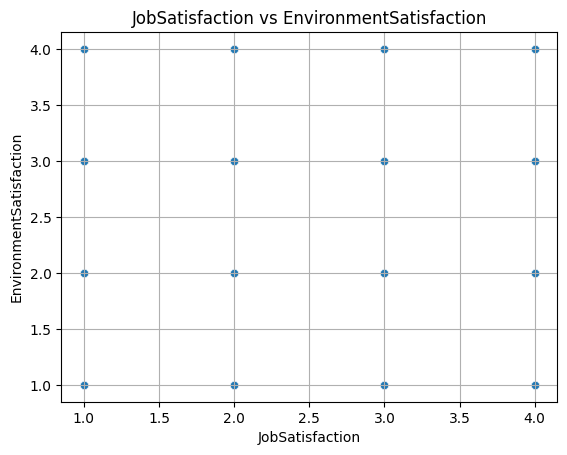

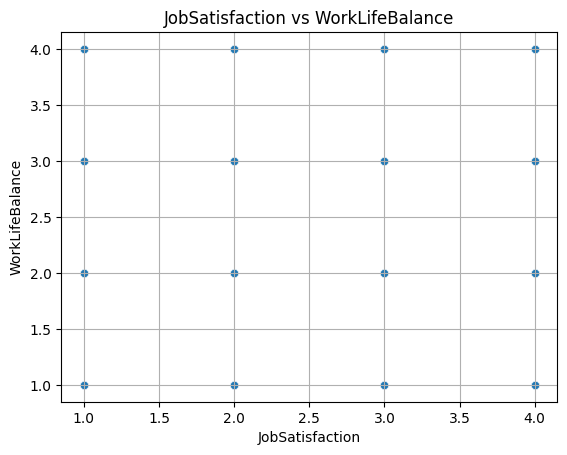

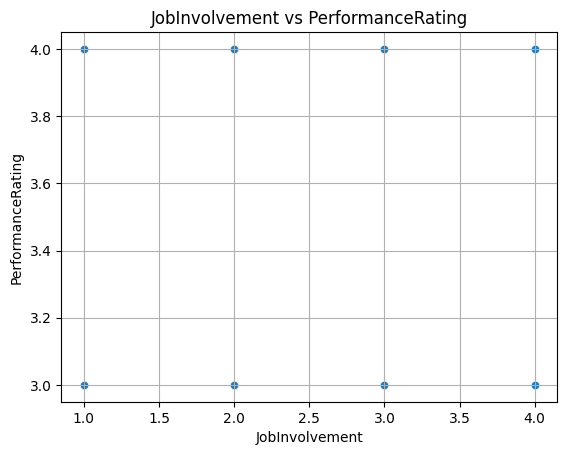

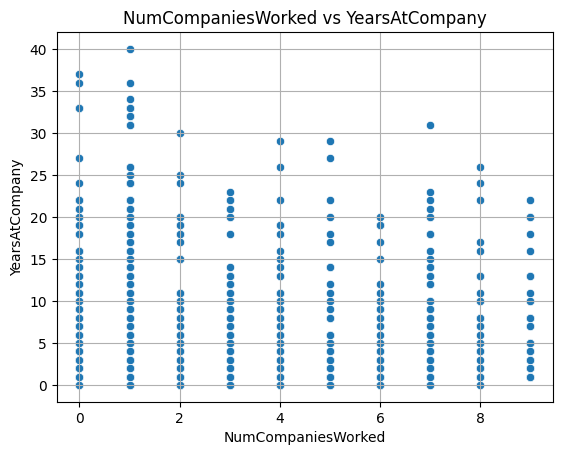

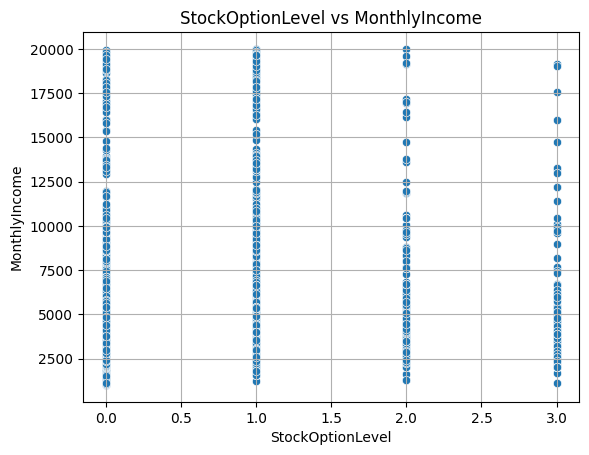

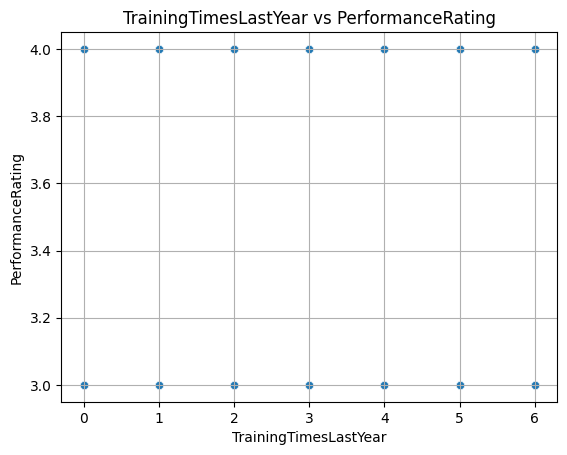

In [13]:
plot_scatterplot(features_to_scatterplot,analysis_df)

Analysis of the graph revealed no anomalies.

### Correlation Analysis

In [14]:
numeric_features = [
    "Age", "DailyRate", "DistanceFromHome", "Education", 
    "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", 
    "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", 
    "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", 
    "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", 
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", 
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"
]

In [15]:
def plot_correlation_heatmap(features, df):
    corr_matrix = df[features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap of Selected Numeric Features")
    plt.show()

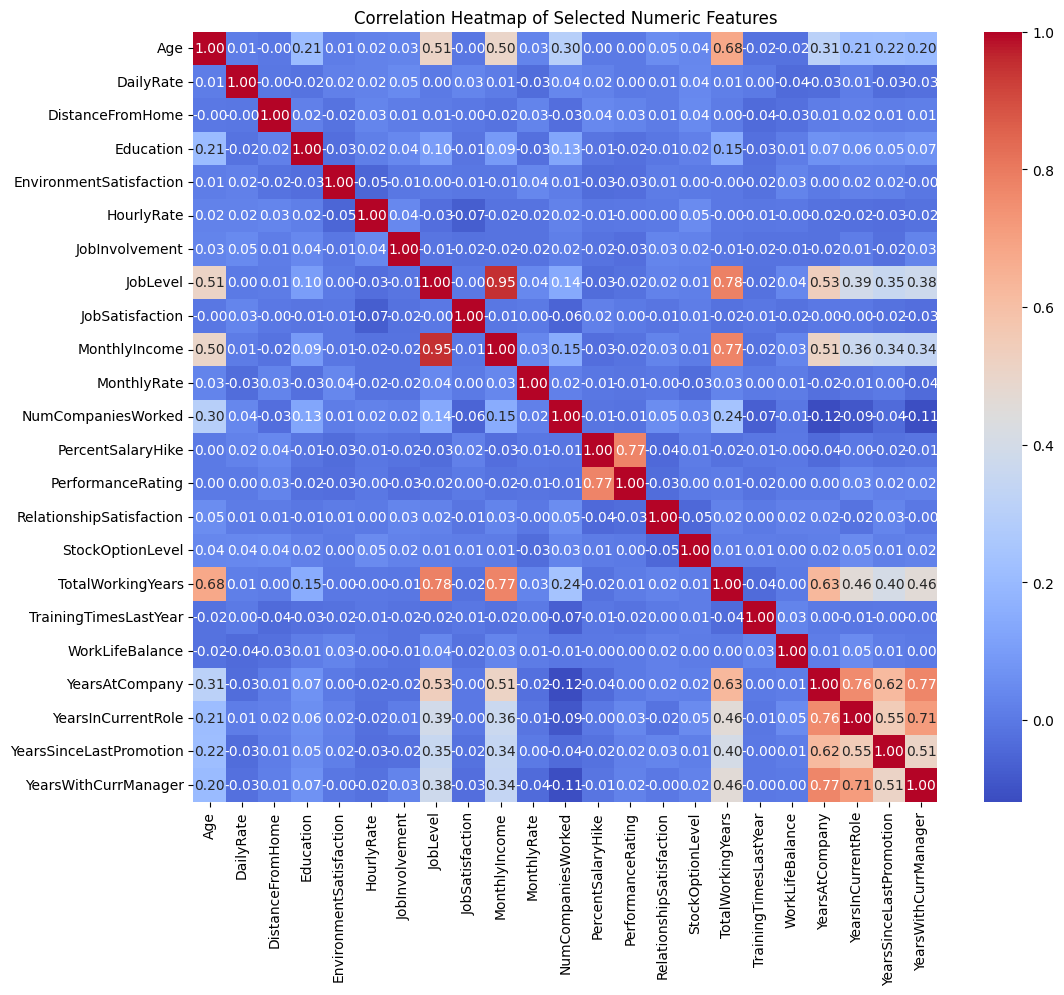

In [16]:
plot_correlation_heatmap(numeric_features, analysis_df)

- **Income vs. Experience/Level:** MonthlyIncome strongly correlates with JobLevel and TotalWorkingYears (~0.77–0.78).  
- **Tenure Relationships:** YearsAtCompany is closely tied to YearsInCurrentRole and YearsWithCurrManager (~0.75–0.77).  
- **Age & Experience:** Age and TotalWorkingYears correlate (~0.68), which makes sense.  
- **Satisfaction Metrics:** JobSatisfaction, EnvironmentSatisfaction, etc., show weak correlations with most numeric features.  
- **Distance & Pay Rates:** DistanceFromHome, DailyRate, and MonthlyRate have minimal correlations with other variables.

## 3️⃣ Machine Learning Models 🤖
- Model Training (Logistic Regression, Random Forest, etc.)  
- Model Evaluation (Accuracy, F1-score, Confusion Matrix)  
- Best Model Selection  

In [17]:
df = DataSet

column_to_drop = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
df = df.drop(columns=column_to_drop,axis=1)

In [18]:
# Encoding binary categorical features using Label Encoding and one-hot encoding for multi-class categorical features.
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Attrition', 'Gender', 'OverTime']
encoder = LabelEncoder()
for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)


In [19]:
# Scaling numerical features to standardize their values (mean = 0, std = 1) for better model performance.
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [20]:
# Splitting training and testing dataset.
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Checking class distribution in y_train before undersampling.
y_train.value_counts()

Attrition
0    986
1    190
Name: count, dtype: int64

In [22]:
# Applying undersampling to balance class distribution and storing the resampled data.
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=.5, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [23]:
# Checking class distribution in y_train after undersampling.
y_resampled.value_counts()

Attrition
0    380
1    190
Name: count, dtype: int64

In [38]:
# Storing the resampling dataframe as csv.
df.to_csv("../Outputs/Data/processed_data.csv", index=False)

In [25]:
# Importing various model to performance comparision.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Importing evaluation metrics to assess model performance.
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Storing models in a dictionary for comparison
models = {
    "Logistic Regression": LogisticRegression(random_state=42,solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGB Classifier" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBM Classifier" : LGBMClassifier(class_weight="balanced", random_state=42),
    "Cat Boost Classifier" : CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0),
    "KNN" : KNeighborsClassifier(n_neighbors=45)
}

# Initializing a result dictionary to track performance metrics for each model.
result_dict = {
    "model": [],
    "0_precision": [],
    "0_recall": [],
    "0_f1": [],
    "1_precision": [],
    "1_recall": [],
    "1_f1": [],
    "accuracy": []
}

In [27]:
# Loop to train, evaluate and store performance metric for each model.
for Model_Name, Model in models.items():
    print(f"Training {Model_Name}...")

    # Training the model.
    Model.fit(X_resampled, y_resampled)
    y_pred = Model.predict(X_test)

    # Get classification report as a dictionary.
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Append results into result_dict.
    result_dict["model"].append(Model_Name)
    result_dict["0_precision"].append(report_dict["0"]["precision"])
    result_dict["0_recall"].append(report_dict["0"]["recall"])
    result_dict["0_f1"].append(report_dict["0"]["f1-score"])
    result_dict["1_precision"].append(report_dict["1"]["precision"])
    result_dict["1_recall"].append(report_dict["1"]["recall"])
    result_dict["1_f1"].append(report_dict["1"]["f1-score"])
    result_dict["accuracy"].append(accuracy_score(y_test, y_pred))

    print(f"{Model_Name} evaluation completed.\n")

Training Logistic Regression...
Logistic Regression evaluation completed.

Training Decision Tree...
Decision Tree evaluation completed.

Training Random Forest...
Random Forest evaluation completed.

Training SVM...
SVM evaluation completed.

Training XGB Classifier...


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier evaluation completed.

Training LGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [28]:
# Converting result_dict to Dataframe.
Result_Dataframe = pd.DataFrame(result_dict)
Result_Dataframe.head(10)

model  0_precision  0_recall      0_f1  1_precision  \
0   Logistic Regression     0.919149  0.874494  0.896266     0.474576   
1         Decision Tree     0.877119  0.838057  0.857143     0.310345   
2         Random Forest     0.888000  0.898785  0.893360     0.431818   
3                   SVM     0.897119  0.882591  0.889796     0.431373   
4        XGB Classifier     0.902655  0.825911  0.862579     0.367647   
5       LGBM Classifier     0.907895  0.838057  0.871579     0.393939   
6  Cat Boost Classifier     0.906780  0.866397  0.886128     0.431034   
7                   KNN     0.865724  0.991903  0.924528     0.818182   

   1_recall      1_f1  accuracy  
0  0.595745  0.528302  0.829932  
1  0.382979  0.342857  0.765306  
2  0.404255  0.417582  0.819728  
3  0.468085  0.448980  0.816327  
4  0.531915  0.434783  0.778912  
5  0.553191  0.460177  0.792517  
6  0.531915  0.476190  0.812925  
7  0.191489  0.310345  0.863946

In [29]:
# Describing the Result_Dataframe.
Result_Dataframe.describe()

0_precision  0_recall      0_f1  1_precision  1_recall      1_f1  \
count     8.000000  8.000000  8.000000     8.000000  8.000000  8.000000   
mean      0.895555  0.877024  0.885172     0.457364  0.457447  0.427402   
std       0.017626  0.052740  0.021521     0.154084  0.130168  0.070814   
min       0.865724  0.825911  0.857143     0.310345  0.191489  0.310345   
25%       0.885280  0.838057  0.869329     0.387366  0.398936  0.398901   
50%       0.899887  0.870445  0.887962     0.431204  0.500000  0.441881   
75%       0.907058  0.886640  0.894087     0.442508  0.537234  0.464180   
max       0.919149  0.991903  0.924528     0.818182  0.595745  0.528302   

       accuracy  
count  8.000000  
mean   0.809949  
std    0.030985  
min    0.765306  
25%    0.789116  
50%    0.814626  
75%    0.822279  
max    0.863946

#### **Observations and Conclusions**

1. **Highest Accuracy**  
   - The **KNN** model achieved the highest accuracy of **0.8639**. This means that, overall, it correctly predicted the most labels among all models.

2. **Class 1 (Minority Class) Performance**  
   - When focusing on the **recall** of Class 1 (i.e., how many positive instances we are correctly identifying), **LGBM Classifier** has a high recall of **0.553**, but even more interesting is that **Logistic Regression** achieves the **highest F1-score (1_f1)** of **0.5283** for Class 1.  
   - This suggests that **Logistic Regression** strikes a good balance between precision and recall for the positive class compared to other models.

3. **Trade-Offs**  
   - Even though **KNN** has the highest accuracy, its recall for Class 1 is quite low (**0.1914**), indicating it might be missing many positive cases.

4. **Overall Balance**  
   - **Cat Boost**, **Random Forest**, and **SVM** all show respectable accuracy (above **0.81** for the most part) and moderate performance for the positive class. They might be good “middle ground” options if one wants decent accuracy and doesn’t want to lose too much recall for Class 1.

5. **Final Takeaway**  
   - **Choose KNN** if you only care about the maximum overall accuracy.  
   - **Choose Logistic Regression** if capturing Class 1 instances accurately is a priority (best F1 for Class 1).  
   - **Ensemble methods (LGBM, CatBoost, XGB)** also provide competitive performance, often balancing accuracy with better recall for the positive class.

6. **Conclusion**:
   - Each model has its own strengths:
      * **KNN** leads in overall accuracy.  
      * **Logistic Regression** is excellent for Class 1 F1-score.  
      * **LGBM** and **CatBoost** offer a good mix of accuracy and Class 1 recall.  


For our specific requirement of **high recall**, the **Logistic Regression** model seems more suitable than **KNN**. While **KNN** does have the highest accuracy, its recall for the positive class is quite low. On the other hand, Logistic Regression balances a good accuracy score with a much better recall, making it a more reliable choice for scenarios where correctly identifying positives is crucial.

### **Ensemble Model**

Now, to take it a step further and enhance performance, we will build and evaluate an ensemble model with a hard-voting scheme, comparing its results against the individual models.

In [30]:
# Importing required Libraries.
from itertools import combinations
from sklearn.ensemble import VotingClassifier

# Function to generate all possible model combinations from the models dictionary, create ensemble models using hard voting, train them, evaluate their performance, and store the evaluation metrics.
def evaluate_voting_combinations_to_df(models, X_train, y_train, X_test, y_test):
    result_dict = {
        "model": [],
        "0_precision": [],
        "0_recall": [],
        "0_f1": [],
        "1_precision": [],
        "1_recall": [],
        "1_f1": [],
        "accuracy": []
    }
    
    # Generates combinations of models (using at least 2 models)
    for r in range(2, len(models) + 1):
        for model_combination in combinations(models.items(), r):
            # Get model names and estimator tuples for VotingClassifier
            model_names = [name for name, _ in model_combination]
            model_str = ", ".join(model_names)
            estimators = list(model_combination)
            
            # Create VotingClassifier with hard voting
            voting_clf = VotingClassifier(estimators=estimators, voting='hard')
            voting_clf.fit(X_train, y_train)
            y_pred = voting_clf.predict(X_test)
            
            # Calculate accuracy and generate classification report
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            
            # Extract metrics for classes "0" and "1"
            precision0 = report.get("0", {}).get("precision", 0)
            recall0    = report.get("0", {}).get("recall", 0)
            f10        = report.get("0", {}).get("f1-score", 0)
            
            precision1 = report.get("1", {}).get("precision", 0)
            recall1    = report.get("1", {}).get("recall", 0)
            f11        = report.get("1", {}).get("f1-score", 0)
            
            # Append metrics to the result dictionary
            result_dict["model"].append(model_str)
            result_dict["0_precision"].append(precision0)
            result_dict["0_recall"].append(recall0)
            result_dict["0_f1"].append(f10)
            result_dict["1_precision"].append(precision1)
            result_dict["1_recall"].append(recall1)
            result_dict["1_f1"].append(f11)
            result_dict["accuracy"].append(accuracy)
            
            print(f"Tested combination: {model_str}, Accuracy: {accuracy:.4f}")
    
    # Convert result_dict to a Pandas DataFrame
    df_results = pd.DataFrame(result_dict)
    
    # Sort the DataFrame by accuracy in descending order
    df_results.sort_values(by="accuracy", ascending=False, inplace=True)
    
    return df_results


In [31]:
# Calling the function with all the arguments to get the dataframe of results.
df_results = evaluate_voting_combinations_to_df(models, X_resampled, y_resampled, X_test, y_test)

Tested combination: Logistic Regression, Decision Tree, Accuracy: 0.8537
Tested combination: Logistic Regression, Random Forest, Accuracy: 0.8741
Tested combination: Logistic Regression, SVM, Accuracy: 0.8469


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, LGBM Classifier, Accuracy: 0.8265
Tested combination: XGB Classifier, Cat Boost Classifier, Accuracy: 0.8163
Tested combination: XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8061


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Accuracy: 0.8095
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Accuracy: 0.8095
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Accuracy: 0.8061
Tested combination: Decision Tree, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8061
Tested combination: Decision Tree, XGB Classifier, KNN, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8061
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.7959


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, KNN, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8027


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8095
Tested combination: SVM, XGB Classifier, KNN, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.7925
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, KNN, Accuracy: 0.8673
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, KNN, Accuracy: 0.8776
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8810


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8810
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8197


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, KNN, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8129


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8333
Tested combination: Decision Tree, SVM, XGB Classifier, KNN, Accuracy: 0.8435


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8299


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8469


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8537
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Accuracy: 0.8197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8197


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, KNN, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8095


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8265


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8061
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8265


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8435
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:00:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8299


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8095


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8129


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8163


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8537
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8435


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8503
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8537


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8435
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [39]:
# Storing the dataframe as a CSV.
df_results.to_csv("../Outputs/Models/ensemble_model_results.csv")

In [40]:
# Output the first five row from the dataframes.
df_results.head()

model  0_precision  0_recall  \
118  Logistic Regression, LGBM Classifier, Cat Boos...     0.908397  0.963563   
108  Logistic Regression, Random Forest, Cat Boost ...     0.895911  0.975709   
107  Logistic Regression, Random Forest, LGBM Class...     0.895911  0.975709   
48      Logistic Regression, Cat Boost Classifier, KNN     0.914397  0.951417   
102       Logistic Regression, Random Forest, SVM, KNN     0.895522  0.971660   

         0_f1  1_precision  1_recall      1_f1  accuracy  
118  0.935167     0.718750  0.489362  0.582278  0.887755  
108  0.934109     0.760000  0.404255  0.527778  0.884354  
107  0.934109     0.760000  0.404255  0.527778  0.884354  
48   0.932540     0.675676  0.531915  0.595238  0.884354  
102  0.932039     0.730769  0.404255  0.520548  0.880952

In [42]:
# Describe the Dataframe.
df_results.describe()

0_precision    0_recall        0_f1  1_precision    1_recall  \
count   247.000000  247.000000  247.000000   247.000000  247.000000   
mean      0.894701    0.913406    0.903567     0.506880    0.433198   
std       0.010407    0.031499    0.013417     0.093107    0.076749   
min       0.857143    0.846154    0.872651     0.385965    0.127660   
25%       0.889796    0.890688    0.894093     0.444558    0.404255   
50%       0.895349    0.914980    0.904000     0.487179    0.446809   
75%       0.901639    0.931174    0.911243     0.529412    0.489362   
max       0.914530    0.995951    0.935167     0.857143    0.574468   

             1_f1    accuracy  
count  247.000000  247.000000  
mean     0.456464    0.836638  
std      0.052899    0.020072  
min      0.222222    0.792517  
25%      0.436213    0.823129  
50%      0.459770    0.836735  
75%      0.484848    0.846939  
max      0.595238    0.887755

In [43]:
# Building an ensemble model using the best model combination from the dataframes. 
ensemble_model = {
    "LogisticRegression": models["Logistic Regression"],
    "CatBoostClassifier" : models["Cat Boost Classifier"],
    "KNN" : models["KNN"]
}

In [44]:
# Creating the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in ensemble_model.items()],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_resampled, y_resampled)

# Predict
y_pred = voting_clf.predict(X_test)

In [45]:
# Evaluating the Model.
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Ensemble Model Accuracy: 0.8843537414965986
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.68      0.53      0.60        47

    accuracy                           0.88       294
   macro avg       0.80      0.74      0.76       294
weighted avg       0.88      0.88      0.88       294



#### **Ensemble Model Results vs. Individual Models**  

- **Accuracy**: The ensemble model (combining Logistic Regression, CatBoost, and KNN) achieves an **accuracy of 0.8843**, performing competitively with individual models while improving overall classification balance.  
- **Class 0 Performance**: The model performs well in predicting Class 0 (employees who stay), with a **precision of 0.91** and a **recall of 0.95**, ensuring strong identification of non-attrition cases.  
- **Class 1 Performance**: The ensemble model achieves a **recall of 0.53** for Class 1 (employees who leave), which is an improvement over some individual models but still shows room for enhancement in detecting attrition cases.  
- **Trade-Off**: While the ensemble model maintains high accuracy and balanced performance, organizations prioritizing **higher recall for attrition cases** may explore further optimization, such as adjusting class weights, fine-tuning hyperparameters, or incorporating additional models into the ensemble.

## 4️⃣ SHAP Analysis 📊
- Feature Importance  
- Key Factors Driving Attrition 

In [46]:
import shap

# Select a representative background sample for SHAP KernelExplainer
background_sample = X_resampled.sample(min(100, len(X_resampled)), random_state=42)

# Initialize SHAP KernelExplainer with the ensemble model
explainer = shap.KernelExplainer(voting_clf.predict, background_sample, link="identity")

# Compute SHAP values efficiently
shap_values = explainer.shap_values(X_test, nsamples=100)

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
  0%|          | 0/294 [00:00<?, ?it/s]/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn

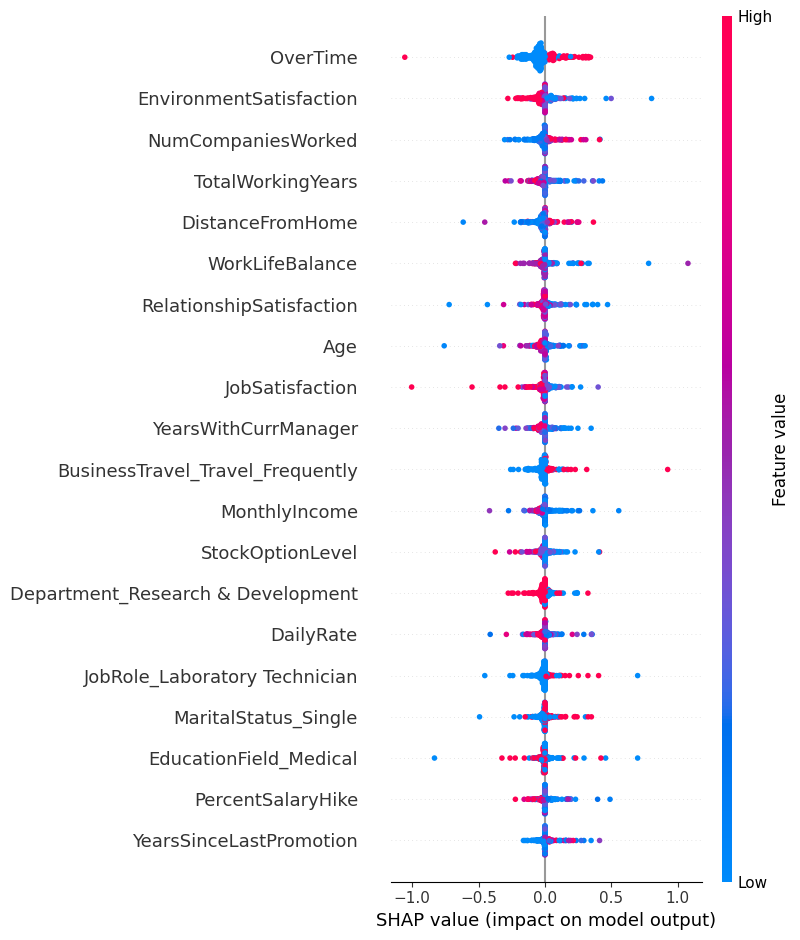

In [ ]:
# Generate SHAP summary plot for feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)

# Save the SHAP plot as a PNG file
plt.savefig("../Outputs/SHAP_Summary_Plot.png", dpi=300, bbox_inches="tight")
plt.show()

## 🏆 Conclusion & Recommendations  

### 🔍 Summary of Findings  

1. **OverTime**  
   - This is the most important factor in predicting attrition.  
   - Employees who work **too much overtime** (🔴 red dots) are **more likely to leave**.  

2. **Environment Satisfaction**  
   - Employees with **high satisfaction** (🔴 red) are **less likely to leave**.  
   - Those with **low satisfaction** (🔵 blue) have a **higher chance of leaving**.  

3. **Number of Companies Worked**  
   - Employees who have worked at **many companies before** (🔴 red) tend to **leave more often**.  
   - Those who have worked at **fewer companies** (🔵 blue) are more **likely to stay**.  
  
4. **Distance From Home**  
   - Employees with a **long commute** (🔴 red) are **more likely to quit**.  
   - Those living **closer to work** (🔵 blue) tend to stay.  

5. **Work-Life Balance**  
   - **Good work-life balance** (🔴 red) helps in **retaining employees**.  
   - **Poor balance** (🔵 blue) makes employees **want to leave**.

6. **Job Satisfaction**  
   - Employees with **low satisfaction** (🔵 blue) are **more likely to leave**.  
   - Those who are **highly satisfied** (🔴 red) usually stay.  

7. **Years With Current Manager**  
   - Employees who have worked with their **manager for a long time** (🔴 red) tend to **stay**.  
   - Those who **frequently change managers** (🔵 blue) are **more likely to leave**.  

8. **Business Travel**  
   - **Frequent travelers** (🔴 red) have a **higher risk of leaving**.  
   - Employees with **less travel** (🔵 blue) tend to stay.  

---

### 💡 Suggestions Based on Findings to Reduce Attrition  

#### 1️⃣ OverTime & Work‐Life Balance  
✅ **Reduce Excessive Overtime**:  
   - Implement policies and tools to monitor and limit overtime.  
   - Encourage employees to take breaks and time off.  
✅ **Flexible Scheduling**:  
   - Offer flexible or hybrid work options to improve work-life balance.  

#### 2️⃣ Improve Satisfaction & Workplace Environment  
✅ **Enhance Environment Satisfaction**:  
   - Invest in a positive workplace culture and better facilities.  
   - Provide clear feedback channels on working conditions.  
✅ **Boost Job Satisfaction**:  
   - Recognize achievements and encourage professional growth.  
   - Ensure employees have meaningful, engaging work.  

#### 3️⃣ Fair Compensation & Financial Incentives  
✅ **Competitive Pay**:  
   - Regularly benchmark salaries and adjust to market rates.  
✅ **Performance‐Based Raises/Bonuses**:  
   - Reward high performers to prevent them from leaving.  

#### 4️⃣ Career Progression & Development  
✅ **Clear Promotion Paths**:  
   - Outline transparent criteria for career advancement.  
✅ **Mentorship & Training**:  
   - Provide ongoing skill development and mentorship programs.  

#### 5️⃣ Address Commute & Travel Challenges  
✅ **Flexible/Remote Work Arrangements**:  
   - Reduce turnover for employees with long commutes.  
✅ **Commuting Benefits**:  
   - Offer transport subsidies or relocation assistance.  

#### 6️⃣ Monitor Engagement & Predictive Insights  
✅ **Early Warnings for High‐Risk Employees**:  
   - Use analytics to identify employees at risk of leaving.  
✅ **Personalized Retention Interventions**:  
   - Conduct stay interviews and provide targeted support.  

#### 7️⃣ Leverage Industrial/Organizational (I/O) Psychologists  
✅ **Data-Driven Workplace Improvements**:  
   - Analyze employee data to identify workplace culture gaps.  
✅ **Targeted Organizational Strategies**:  
   - Develop evidence-based interventions like leadership training and well-being programs.  

---

By focusing on:  
✅ **Work‐Life Balance**  
✅ **Employee Satisfaction**  
✅ **Competitive Compensation**  
✅ **Career Growth**  
✅ **Commuting Options**  
✅ **Predictive Monitoring**  

HR teams can **significantly reduce turnover**. Incorporating **I/O psychologists** provides **research-based assessments**, **tailored interventions**, and a **long‐term strategy** for retaining employees. 🚀  
